In [96]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.api.types import is_string_dtype
import os
os.chdir('/Users/fulinq/Documents/SET_Intern/SOMC/TradingData')

In [97]:
startdate = '2021-01-01'
startdate = pd.to_datetime(startdate)

In [98]:
se = pd.read_csv(r"SET 50 Historical Data (7).csv")
se

,Date,Price,Open,High,Low,Vol.,Change %
0,03/31/2025,739.77,737.73,747.03,737.73,1.64B,-1.46%
1,03/28/2025,750.73,756.71,756.88,748.76,894.66M,-1.10%
2,03/27/2025,759.10,759.32,762.76,756.82,1.39B,-0.03%
3,03/26/2025,759.36,756.45,762.84,756.45,1.15B,0.55%
4,03/25/2025,755.22,758.42,758.72,750.91,1.28B,-0.40%
...,...,...,...,...,...,...,...
1269,01/08/2020,"1,057.19","1,063.94","1,066.77","1,054.24",1.97B,-1.66%
1270,01/07/2020,"1,075.07","1,071.20","1,075.20","1,062.78",1.58B,1.06%
1271,01/06/2020,"1,063.83","1,072.49","1,074.50","1,061.17",2.03B,-1.45%
1272,01/03/2020,"1,079.50","1,081.12","1,086.71","1,077.32",1.48B,-0.14%


In [99]:
se['Date'] = pd.to_datetime(se['Date']) 
se.set_index('Date', inplace=True)  
se   

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-03-31,739.77,737.73,747.03,737.73,1.64B,-1.46%
2025-03-28,750.73,756.71,756.88,748.76,894.66M,-1.10%
2025-03-27,759.10,759.32,762.76,756.82,1.39B,-0.03%
2025-03-26,759.36,756.45,762.84,756.45,1.15B,0.55%
2025-03-25,755.22,758.42,758.72,750.91,1.28B,-0.40%
...,...,...,...,...,...,...
2020-01-08,"1,057.19","1,063.94","1,066.77","1,054.24",1.97B,-1.66%
2020-01-07,"1,075.07","1,071.20","1,075.20","1,062.78",1.58B,1.06%
2020-01-06,"1,063.83","1,072.49","1,074.50","1,061.17",2.03B,-1.45%


In [100]:
se = se[se.index >= startdate]
se

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-03-31,739.77,737.73,747.03,737.73,1.64B,-1.46%
2025-03-28,750.73,756.71,756.88,748.76,894.66M,-1.10%
2025-03-27,759.10,759.32,762.76,756.82,1.39B,-0.03%
2025-03-26,759.36,756.45,762.84,756.45,1.15B,0.55%
2025-03-25,755.22,758.42,758.72,750.91,1.28B,-0.40%
...,...,...,...,...,...,...
2021-01-08,977.59,965.70,977.59,964.91,3.00B,2.32%
2021-01-07,955.39,952.69,959.29,946.05,4.56B,1.59%
2021-01-06,940.41,951.94,957.42,935.88,3.41B,-1.42%


In [101]:
file_path = r"SET_DELTA_Groupby.xlsx"

df_price = pd.read_excel(file_path, sheet_name="Settlement Price Movement")

df_del = pd.read_excel(file_path, sheet_name="Delta Movement")
df_price

,END_DATE,NAME,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,2021-01-11 00:00:00,2021-01-12 00:00:00,2021-01-13 00:00:00,...,2024-12-17 00:00:00,2024-12-18 00:00:00,2024-12-19 00:00:00,2024-12-20 00:00:00,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,2024-12-27 00:00:00,2024-12-30 00:00:00
0,2021-01-29,S50F21C1000,4.9,11.6,7.6,10.5,17.4,13.9,12.9,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-29,S50F21C1025,2.5,6.6,4.0,5.7,10.1,7.4,6.6,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-29,S50F21C1050,1.1,3.5,2.0,2.9,5.5,3.6,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-29,S50F21C1075,NaN,NaN,NaN,NaN,NaN,1.6,1.3,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-29,S50F21C650,272.6,302.4,289.0,304.0,326.2,323.8,324.5,329.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,2025-06-30,S50M25P875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,19.5
1410,2025-06-30,S50M25P900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.7,30.0
1411,2025-06-30,S50M25P925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.5,45.1
1412,2025-06-30,S50M25P950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,62.1


In [102]:
df_del

,index,END_DATE,NAME,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,...,2024-12-16 00:00:00,2024-12-17 00:00:00,2024-12-18 00:00:00,2024-12-19 00:00:00,2024-12-20 00:00:00,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,2024-12-27 00:00:00
0,0,2020-01-31,S50F20C1000,0.9914,0.9927,0.9730,0.9869,0.9444,0.9736,0.9794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-01-31,S50F20C1025,0.9519,0.9551,0.8767,0.9306,0.8110,0.8933,0.9053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-01-31,S50F20C1050,0.8165,0.8156,0.6529,0.7655,0.5722,0.7113,0.7209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2020-01-31,S50F20C1075,0.5596,0.5439,0.3607,0.4924,0.3076,0.4537,0.4495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-01-31,S50F20C1100,0.2785,0.2539,0.1377,0.2276,0.1205,0.2190,0.2050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,1803,2025-06-30,S50M25P875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3388
1804,1804,2025-06-30,S50M25P900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4548
1805,1805,2025-06-30,S50M25P925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5710
1806,1806,2025-06-30,S50M25P950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.6778


In [103]:
df_del['END_DATE'] = pd.to_datetime(df_del['END_DATE'])
end_date_dict = df_del.groupby('END_DATE')['NAME'].unique().apply(list).to_dict()


In [104]:
for i, (end_date, sub_df) in enumerate(df_del.groupby('END_DATE'), start=1):
    globals()[f"df_del_{i}"] = sub_df.reset_index(drop=True)

In [105]:
df_del_vars = [name for name in globals() if name.startswith('df_del_') and name[8:].isdigit()]
sorted_indices = sorted([int(name.split('_')[-1]) for name in df_del_vars])
print("ลำดับ i ที่มีอยู่:", sorted_indices)

ลำดับ i ที่มีอยู่: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


In [106]:
for i in range(1, 67):
    df = globals()[f'df_del_{i}']

    # 1. Drop columns that are entirely NaN BEFORE melt
    df = df.dropna(axis=1, how='all')

    # 2. Melt: convert wide to long
    df_melted = df.melt(id_vars=['END_DATE', 'NAME'], var_name='Date', value_name='Price')

    # 3. Convert Date to datetime
    df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')

    # 4. Pivot: Date as row index, NAME as column
    df_pivoted = df_melted.pivot(index='Date', columns='NAME', values='Price')

    # 5. Sort for neatness
    df_pivoted = df_pivoted.sort_index().sort_index(axis=1)

    # 6. Save back to globals
    globals()[f'df_del_{i}'] = df_pivoted


/var/folders/rc/w7r40l35143bxwkzfxdygctc0000gn/T/ipykernel_29153/1937981542.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
/var/folders/rc/w7r40l35143bxwkzfxdygctc0000gn/T/ipykernel_29153/1937981542.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
/var/folders/rc/w7r40l35143bxwkzfxdygctc0000gn/T/ipykernel_29153/1937981542.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'

In [108]:
for i in range(1, 67):
    var_name = f'df_del_{i}'
    if var_name in globals():
        df = globals()[var_name]
        if df.empty:
            print(f"{var_name} Emp ❌")
        else:
            print(f"{var_name} Have ✅")

df_del_1 Have ✅
df_del_2 Have ✅
df_del_3 Have ✅
df_del_4 Have ✅
df_del_5 Have ✅
df_del_6 Have ✅
df_del_7 Have ✅
df_del_8 Have ✅
df_del_9 Have ✅
df_del_10 Have ✅
df_del_11 Have ✅
df_del_12 Have ✅
df_del_13 Have ✅
df_del_14 Have ✅
df_del_15 Have ✅
df_del_16 Have ✅
df_del_17 Have ✅
df_del_18 Have ✅
df_del_19 Have ✅
df_del_20 Have ✅
df_del_21 Have ✅
df_del_22 Have ✅
df_del_23 Have ✅
df_del_24 Have ✅
df_del_25 Have ✅
df_del_26 Have ✅
df_del_27 Have ✅
df_del_28 Have ✅
df_del_29 Have ✅
df_del_30 Have ✅
df_del_31 Have ✅
df_del_32 Have ✅
df_del_33 Have ✅
df_del_34 Have ✅
df_del_35 Have ✅
df_del_36 Have ✅
df_del_37 Have ✅
df_del_38 Have ✅
df_del_39 Have ✅
df_del_40 Have ✅
df_del_41 Have ✅
df_del_42 Have ✅
df_del_43 Have ✅
df_del_44 Have ✅
df_del_45 Have ✅
df_del_46 Have ✅
df_del_47 Have ✅
df_del_48 Have ✅
df_del_49 Have ✅
df_del_50 Have ✅
df_del_51 Have ✅
df_del_52 Have ✅
df_del_53 Have ✅
df_del_54 Have ✅
df_del_55 Have ✅
df_del_56 Have ✅
df_del_57 Have ✅
df_del_58 Have ✅
df_del_59 Have ✅
df_del

In [109]:
def extract_strike(name):
    match = re.search(r'(\d+)$', name)
    return float(match.group(1)) if match else np.nan

In [110]:
for i in range(1, 66):
    name = f'df_del_{i}'
    if name in globals():
        df = globals()[name].copy()  # สำรองข้อมูล

        # สร้าง mapping: column → strike
        strike_map = {col: extract_strike(col) for col in df.columns}

        # แปลงราคาเป็น strike โดยไม่แตะ NaN
        for col in df.columns:
            strike = strike_map[col]
            df[col] = df[col].apply(lambda x: strike if pd.notna(x) else np.nan)

        # เขียนกลับเข้า globals
        globals()[f'{name}_1'] = df

In [111]:
for i in range(1, 66):
    df_main = globals().get(f"df_del_{i}")
    df_compare = globals().get(f"df_del_{i}_1")

    if df_main is None or df_compare is None:
        print(f"⚠️ df_del_{i} หรือ df_del_{i}_1 ไม่มีอยู่")
        continue

    if df_main.shape == df_compare.shape:
        print(f"✅ df_del_{i} เท่ากับ df_del_{i}_1")
    else:
        print(f"❌ df_del_{i} และ df_del_{i}_1 ขนาดต่างกัน: {df_main.shape} vs {df_compare.shape}")


✅ df_del_1 เท่ากับ df_del_1_1
✅ df_del_2 เท่ากับ df_del_2_1
✅ df_del_3 เท่ากับ df_del_3_1
✅ df_del_4 เท่ากับ df_del_4_1
✅ df_del_5 เท่ากับ df_del_5_1
✅ df_del_6 เท่ากับ df_del_6_1
✅ df_del_7 เท่ากับ df_del_7_1
✅ df_del_8 เท่ากับ df_del_8_1
✅ df_del_9 เท่ากับ df_del_9_1
✅ df_del_10 เท่ากับ df_del_10_1
✅ df_del_11 เท่ากับ df_del_11_1
✅ df_del_12 เท่ากับ df_del_12_1
✅ df_del_13 เท่ากับ df_del_13_1
✅ df_del_14 เท่ากับ df_del_14_1
✅ df_del_15 เท่ากับ df_del_15_1
✅ df_del_16 เท่ากับ df_del_16_1
✅ df_del_17 เท่ากับ df_del_17_1
✅ df_del_18 เท่ากับ df_del_18_1
✅ df_del_19 เท่ากับ df_del_19_1
✅ df_del_20 เท่ากับ df_del_20_1
✅ df_del_21 เท่ากับ df_del_21_1
✅ df_del_22 เท่ากับ df_del_22_1
✅ df_del_23 เท่ากับ df_del_23_1
✅ df_del_24 เท่ากับ df_del_24_1
✅ df_del_25 เท่ากับ df_del_25_1
✅ df_del_26 เท่ากับ df_del_26_1
✅ df_del_27 เท่ากับ df_del_27_1
✅ df_del_28 เท่ากับ df_del_28_1
✅ df_del_29 เท่ากับ df_del_29_1
✅ df_del_30 เท่ากับ df_del_30_1
✅ df_del_31 เท่ากับ df_del_31_1
✅ df_del_32 เท่ากับ df_del

In [112]:
otm_dict_all = {}

for i in range(1, 67):
    var_name = f'df_del_{i}'
    if var_name not in globals():
        continue

    df = globals()[var_name]
    if df.empty:
        continue

    for date, row in df.iterrows():
        otm_names = []
        for name, delta in row.items():
            if pd.isna(delta):
                continue
            if 'C' in name and (0 <= delta < 0.5):
                otm_names.append(name)
            elif 'P' in name and (-0.5 < delta <= 0):
                otm_names.append(name)

        if date in otm_dict_all:
            otm_dict_all[date].extend(otm_names)
        else:
            otm_dict_all[date] = otm_names


In [113]:
print(len(otm_dict_all))

1212


In [114]:
se['Price'] = se['Price'].replace(',', '', regex=True)
se['Price'] = pd.to_numeric(se['Price'], errors='coerce')

/var/folders/rc/w7r40l35143bxwkzfxdygctc0000gn/T/ipykernel_29153/111425116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se['Price'] = se['Price'].replace(',', '', regex=True)
/var/folders/rc/w7r40l35143bxwkzfxdygctc0000gn/T/ipykernel_29153/111425116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  se['Price'] = pd.to_numeric(se['Price'], errors='coerce')


In [115]:
df_del_65_1

NAME,S50H25C1000,S50H25C1025,S50H25C1050,S50H25C775,S50H25C800,S50H25C825,S50H25C850,S50H25C875,S50H25C900,S50H25C925,...,S50H25P1050,S50H25P775,S50H25P800,S50H25P825,S50H25P850,S50H25P875,S50H25P900,S50H25P925,S50H25P950,S50H25P975
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-27,1000.0,1025.0,NaN,NaN,NaN,825.0,850.0,875.0,900.0,925.0,...,NaN,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2024-09-30,1000.0,1025.0,NaN,NaN,NaN,825.0,850.0,875.0,900.0,925.0,...,NaN,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2024-10-01,1000.0,1025.0,NaN,NaN,NaN,825.0,850.0,875.0,900.0,925.0,...,NaN,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2024-10-02,1000.0,1025.0,NaN,NaN,NaN,825.0,850.0,875.0,900.0,925.0,...,NaN,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2024-10-03,1000.0,1025.0,NaN,NaN,NaN,825.0,850.0,875.0,900.0,925.0,...,NaN,NaN,NaN,825.0,850.0,875.0,900.0,925.0,950.0,975.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,1000.0,1025.0,1050.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,...,1050.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2024-12-25,1000.0,1025.0,1050.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,...,1050.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0
2024-12-26,1000.0,1025.0,1050.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,...,1050.0,775.0,800.0,825.0,850.0,875.0,900.0,925.0,950.0,975.0


In [116]:
loss_summary_list = []

for date, otm_names in otm_dict_all.items():
    try:
        spot = se.loc[date, 'Price']
    except KeyError:
        continue

    losses = []

    for name in otm_names:
        found = False
        for i in range(1, 67):
            try:
                df_strike = globals()[f'df_del_{i}_1']
                K = df_strike.loc[date, name]
                found = True
                break  # เจอแล้วไม่ต้อง loop ต่อ
            except (KeyError, ValueError):
                continue

        if not found or pd.isna(K):
            continue

        if 'C' in name:
            payoff = min(spot - K, 0)
            if i == 65:
                print(spot, K, payoff,"C")
        elif 'P' in name:
            payoff = min(K - spot, 0)
            if i == 65:
                print(spot, K, payoff,"P")
        else:
            continue
        losses.append(payoff)
        
    if len(losses) == 0:
        continue

    summary = {
        'Date': date,
        'Max': np.min(losses),
        'Median': np.median(losses),
        'Avg': np.mean(losses),
        'Q3': np.percentile(losses, 75),
        'VaR_99': np.percentile(losses, 1),
        'Per_25': np.percentile(losses, 25),
        'Min': np.max(losses)
    }
    loss_summary_list.append(summary)

# ✅ สร้าง DataFrame
df_loss_summary = pd.DataFrame(loss_summary_list).set_index('Date')


915.43 1000.0 -84.57000000000005 C
915.43 1025.0 -109.57000000000005 C
915.43 925.0 -9.57000000000005 C
915.43 950.0 -34.57000000000005 C
915.43 975.0 -59.57000000000005 C
915.43 825.0 -90.42999999999995 P
915.43 850.0 -65.42999999999995 P
915.43 875.0 -40.42999999999995 P
915.43 900.0 -15.42999999999995 P
914.07 1000.0 -85.92999999999995 C
914.07 1025.0 -110.92999999999995 C
914.07 925.0 -10.92999999999995 C
914.07 950.0 -35.92999999999995 C
914.07 975.0 -60.92999999999995 C
914.07 825.0 -89.07000000000005 P
914.07 850.0 -64.07000000000005 P
914.07 875.0 -39.07000000000005 P
914.07 900.0 -14.07000000000005 P
924.78 1000.0 -75.22000000000003 C
924.78 1025.0 -100.22000000000003 C
924.78 925.0 -0.22000000000002728 C
924.78 950.0 -25.220000000000027 C
924.78 975.0 -50.22000000000003 C
924.78 825.0 -99.77999999999997 P
924.78 850.0 -74.77999999999997 P
924.78 875.0 -49.77999999999997 P
924.78 900.0 -24.779999999999973 P
924.78 925.0 0 P
917.98 1000.0 -82.01999999999998 C
917.98 1025.0 -107

In [117]:
df_loss_summary = pd.DataFrame(loss_summary_list).sort_values(by='Date').set_index('Date')

In [118]:
df_loss_summary

,Max,Median,Avg,Q3,VaR_99,Per_25,Min
Date,,,,,,,
2021-01-04,-274.36,-75.64,-96.737857,-49.36,-274.36,-125.64,0.00
2021-01-05,-303.99,-87.50,-107.960000,-46.01,-303.99,-153.99,-3.99
2021-01-06,-290.41,-84.59,-101.694035,-40.41,-290.41,-140.41,0.00
2021-01-07,-305.39,-87.50,-108.560000,-44.61,-305.39,-155.39,-5.39
2021-01-08,-327.59,-97.41,-117.042000,-47.41,-327.59,-177.59,-2.59
...,...,...,...,...,...,...,...
2024-12-23,-199.93,-75.07,-77.836792,-25.07,-186.93,-124.93,0.00
2024-12-24,-204.44,-79.44,-81.143529,-45.56,-191.94,-120.56,-4.44
2024-12-25,-207.17,-82.17,-81.304118,-42.83,-194.67,-117.83,-7.17


In [119]:
check = df_loss_summary['VaR_99'] == df_loss_summary['Min']
true_count = check.sum()
false_count = (~check).sum()

print(f"✅ VaR_99 == Min: {true_count} วัน")
print(f"❌ VaR_99 ≠ Min: {false_count} วัน")


✅ VaR_99 == Min: 0 วัน
❌ VaR_99 ≠ Min: 968 วัน


In [120]:
is_duplicated = df_loss_summary.index.duplicated()
num_duplicated = is_duplicated.sum()
print(f"🔁 จำนวน index ที่ซ้ำกัน: {num_duplicated}")

🔁 จำนวน index ที่ซ้ำกัน: 0


In [121]:
df_loss_summary[df_loss_summary.isnull().any(axis=1)]

,Max,Median,Avg,Q3,VaR_99,Per_25,Min
Date,,,,,,,


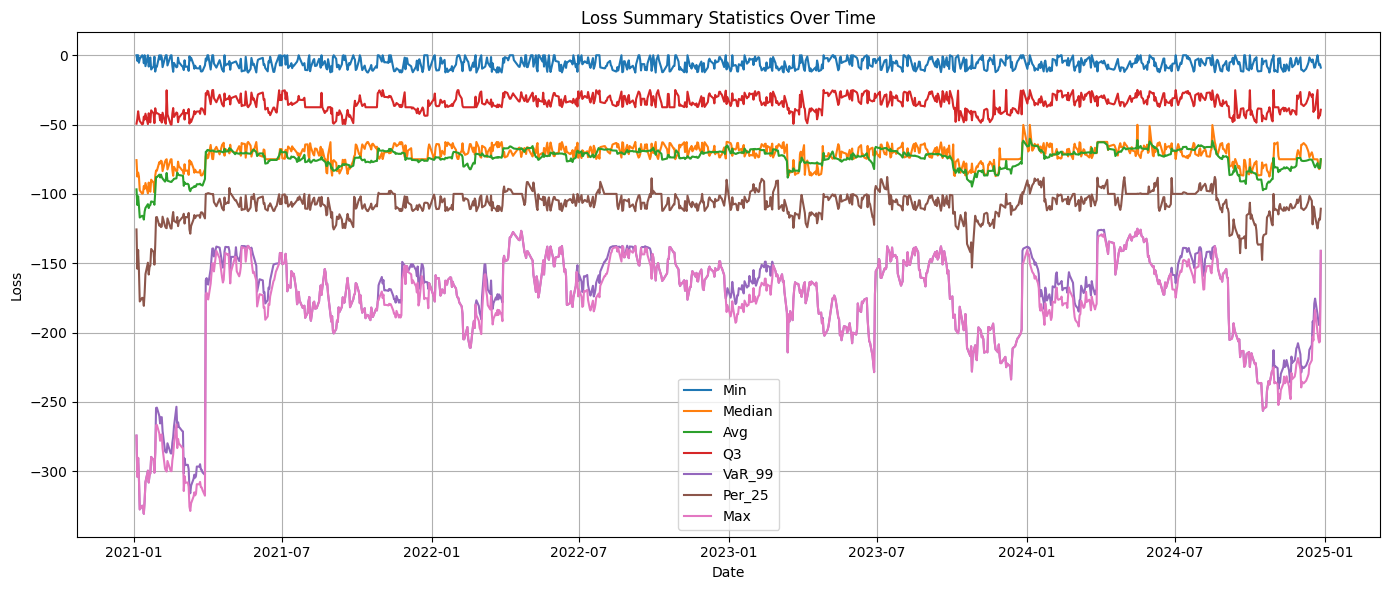

In [122]:
plt.figure(figsize=(14, 6))


plt.plot(df_loss_summary.index, df_loss_summary['Min'], label='Min')
plt.plot(df_loss_summary.index, df_loss_summary['Median'], label='Median')
plt.plot(df_loss_summary.index, df_loss_summary['Avg'], label='Avg')
plt.plot(df_loss_summary.index, df_loss_summary['Q3'], label='Q3')
plt.plot(df_loss_summary.index, df_loss_summary['VaR_99'], label='VaR_99')
plt.plot(df_loss_summary.index, df_loss_summary['Per_25'], label='Per_25')
plt.plot(df_loss_summary.index, df_loss_summary['Max'], label='Max')


plt.title('Loss Summary Statistics Over Time')
plt.xlabel('Date')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

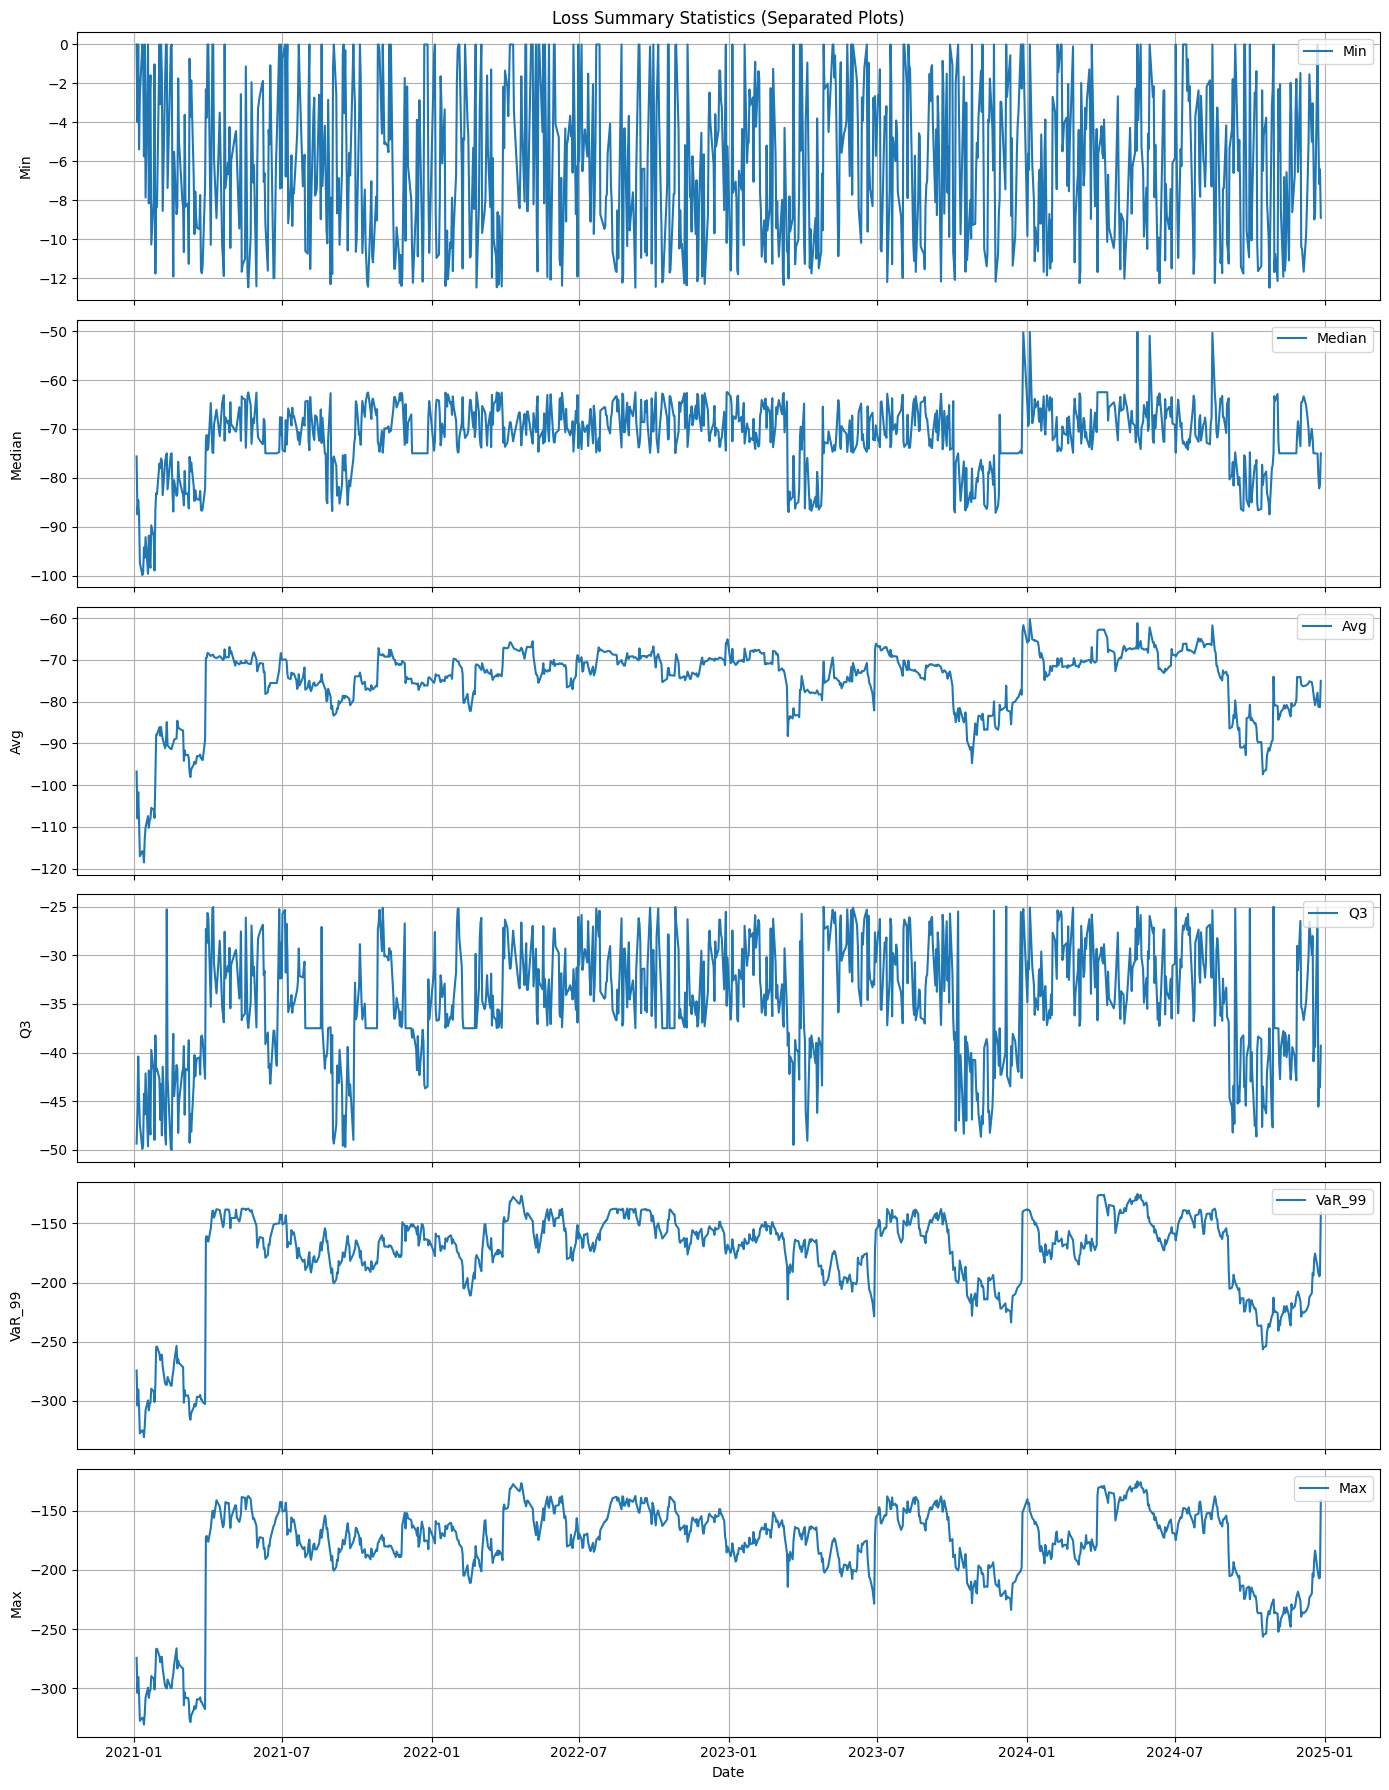

In [123]:
cols = ['Min', 'Median', 'Avg', 'Q3', 'VaR_99', 'Max']
n = len(cols)

fig, axes = plt.subplots(n, 1, figsize=(14, 3 * n), sharex=True)


for i, col in enumerate(cols):
    axes[i].plot(df_loss_summary.index, df_loss_summary[col], label=col, color='tab:blue')
    axes[i].set_ylabel(col)
    axes[i].grid(True)
    axes[i].legend(loc='upper right')

axes[0].set_title('Loss Summary Statistics (Separated Plots)')
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()


In [124]:
df_loss_summary.describe()

,Max,Median,Avg,Q3,VaR_99,Per_25,Min
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,-180.236136,-71.531023,-74.851046,-34.579628,-176.046219,-108.114964,-6.080878
std,39.798113,6.901415,8.237514,5.977858,38.707542,11.008138,3.889912
min,-330.750000,-99.910000,-118.516667,-50.000000,-330.750000,-180.750000,-12.490000
25%,-191.062500,-74.992500,-77.184949,-37.500000,-188.267500,-111.695000,-9.455000
50%,-171.935000,-70.690000,-72.665290,-34.395000,-165.785000,-107.045000,-6.250000
75%,-154.340000,-66.497500,-69.624239,-29.612500,-150.616500,-101.067500,-2.690000
max,-125.150000,-50.150000,-60.240227,-25.000000,-125.150000,-87.750000,0.000000


In [125]:
# ✅ คำนวณ rolling mean ด้วย window = 20
df_rolling = df_loss_summary.rolling(window=rolling_window).mean()

# ✅ ตั้งชื่อ column ให้ชัดว่าเป็น rolling
df_rolling.columns = [f"{col}" for col in df_rolling.columns]


In [126]:
df_rolling

,Max,Median,Avg,Q3,VaR_99,Per_25,Min
Date,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-12-23,-220.9100,-71.2175,-77.160496,-34.24975,-209.77516,-109.55375,-5.9905
2024-12-24,-219.4515,-71.4395,-77.161548,-34.55550,-208.27916,-110.05400,-5.7820
2024-12-25,-218.2225,-71.7980,-77.186129,-34.67825,-207.01266,-110.46425,-5.8030


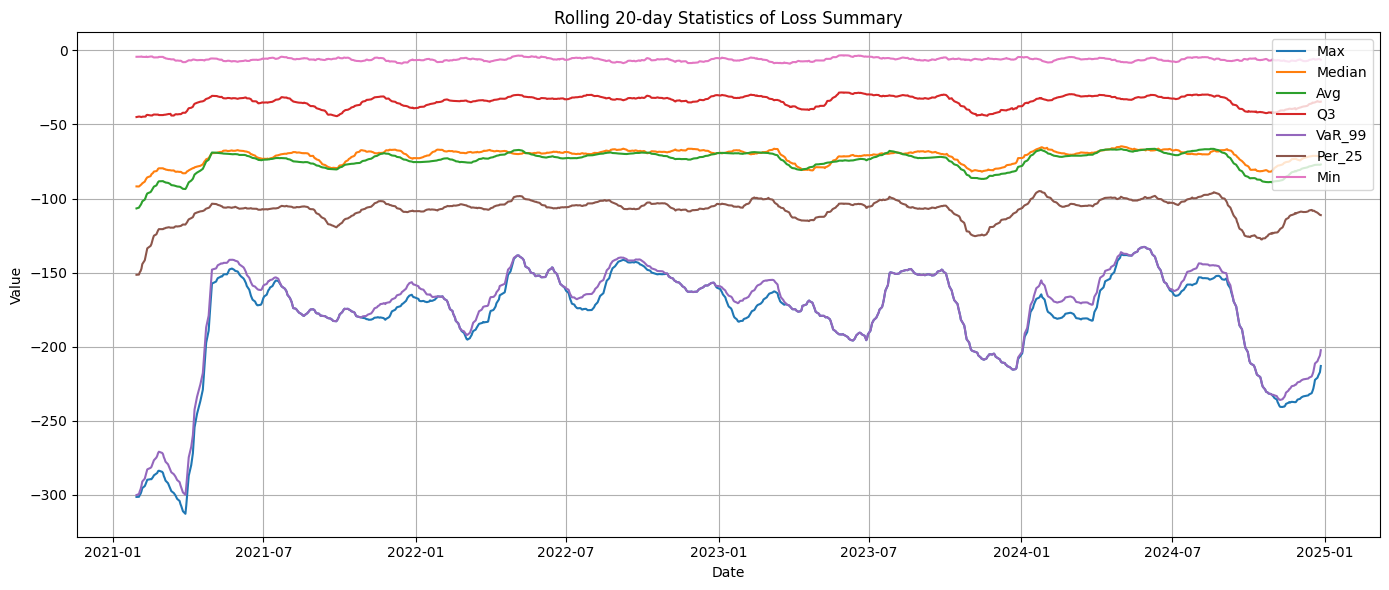

In [127]:
plt.figure(figsize=(14, 6))
for col in df_rolling.columns:
    plt.plot(df_rolling.index, df_rolling[col], label=col)

plt.title("Rolling 20-day Statistics of Loss Summary")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [128]:
somc = pd.read_excel(r"Historical Price Short Option Minimum Charge 1.xlsx")

In [129]:
somc

,Date,Date.1,Short Option Minimum Charge (Baht)
0,2021-01-04,January-2021,260
1,2021-01-05,January-2021,260
2,2021-01-06,January-2021,260
3,2021-01-07,January-2021,260
4,2021-01-08,January-2021,260
...,...,...,...
1030,2025-03-25 00:00:00,March-2025,100
1031,2025-03-26 00:00:00,March-2025,100
1032,2025-03-27 00:00:00,March-2025,100
1033,2025-03-28 00:00:00,March-2025,100


In [130]:
somc['SOMC'] = somc['Short Option Minimum Charge  (Baht)']
somc['SOMC']

0       260
1       260
2       260
3       260
4       260
       ... 
1030    100
1031    100
1032    100
1033    100
1034    100
Name: SOMC, Length: 1035, dtype: int64

In [131]:
somc_series = somc[['Date', 'SOMC']].dropna()
somc_series['Date'] = pd.to_datetime(somc['Date'])

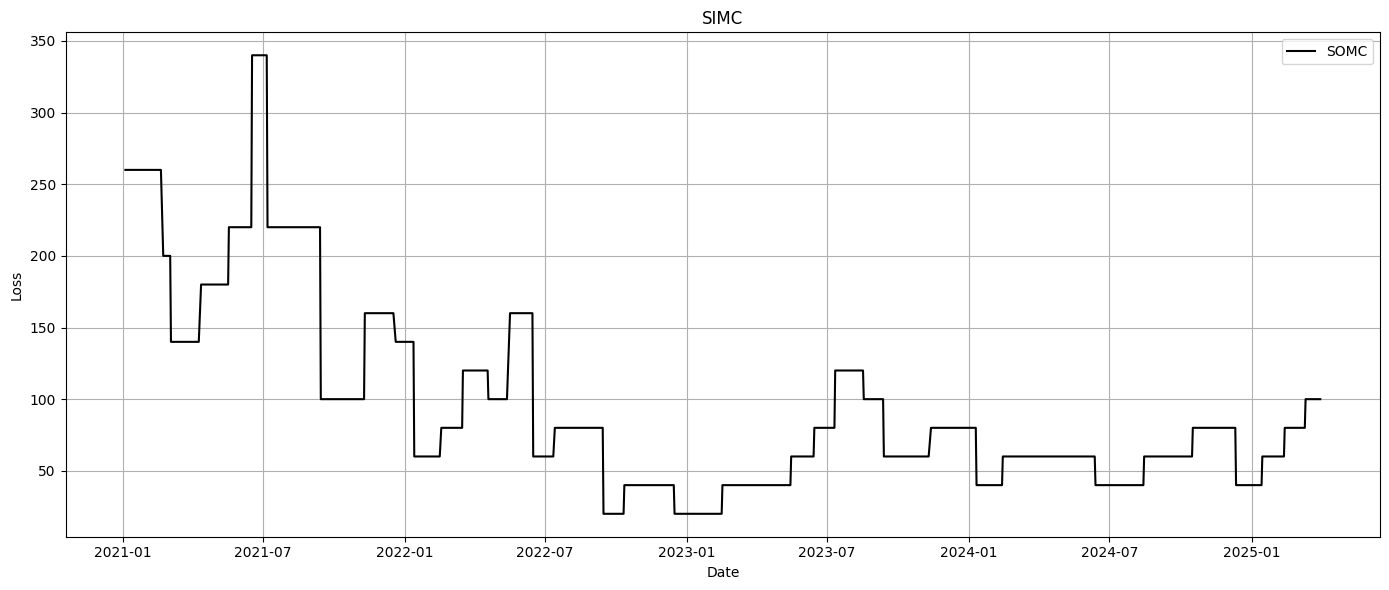

In [132]:
plt.figure(figsize=(14, 6))
plt.plot(somc_series['Date'], somc_series['SOMC'], label='SOMC', color='black')


plt.title('SIMC')
plt.xlabel('Date')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

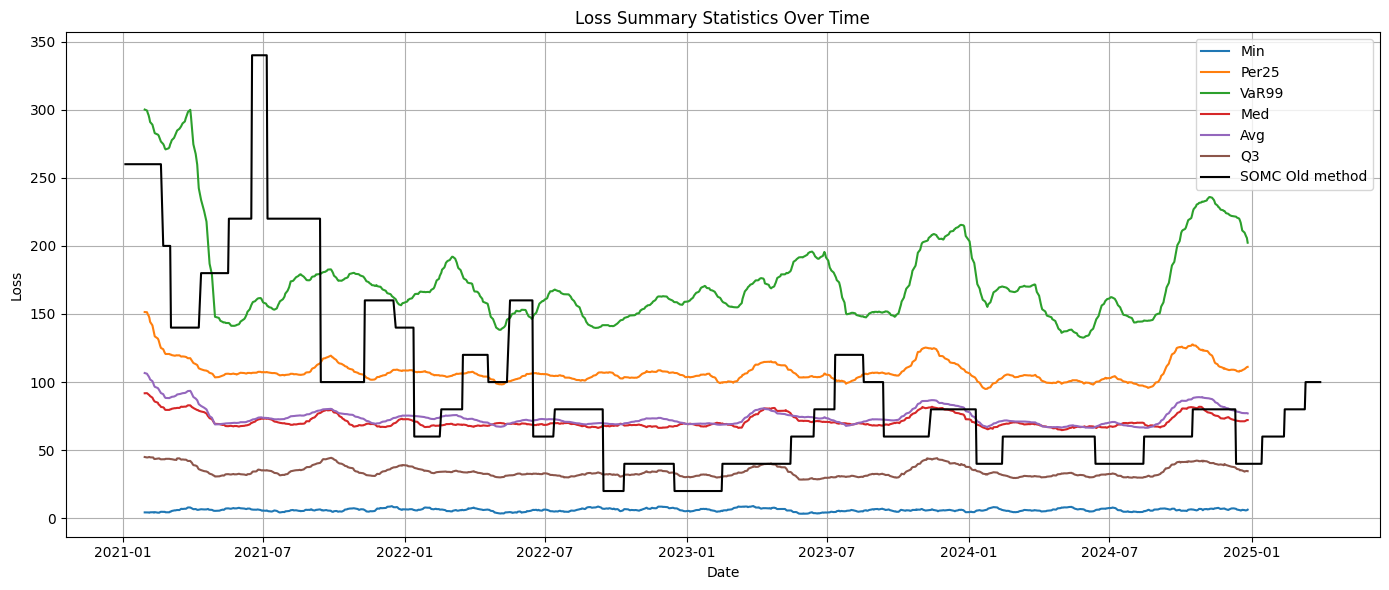

In [133]:
plt.figure(figsize=(14, 6))


plt.plot(df_rolling.index, df_rolling['Min']*-1, label='Min')
plt.plot(df_rolling.index, df_rolling['Per_25']*-1, label='Per25')
plt.plot(df_rolling.index, df_rolling['VaR_99']*-1, label='VaR99')
plt.plot(df_rolling.index, df_rolling['Median']*-1, label='Med')
plt.plot(df_rolling.index, df_rolling['Avg']*-1, label='Avg')
plt.plot(df_rolling.index, df_rolling['Q3']*-1, label='Q3')
plt.plot(somc_series['Date'], somc_series['SOMC'], label='SOMC Old method', color='black')


plt.title('Loss Summary Statistics Over Time')
plt.xlabel('Date')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
df_loss_summary.columns

Index(['Max', 'Median', 'Avg', 'Q3', 'VaR_99', 'Per_25', 'Min'], dtype='object')

In [135]:
for col in df_loss_summary.columns:
    globals()[f"df_r_{col}"] = df_loss_summary[[col]].copy()

In [136]:
window_size = 60  # ปรับได้ตามต้องการ

for col in df_loss_summary.columns:
    df = globals()[f"df_r_{col}"]
    
    # df[f'Rolling_Max']    = df[col].rolling(window=window_size).min()
    # df[f'Rolling_Min']    = df[col].rolling(window=window_size).max()
    # df[f'Rolling_Q2']     = df[col].rolling(window=window_size).quantile(0.5)  # หรือ Median
    # df[f'Rolling_Median'] = df[col].rolling(window=window_size).median()
    df[f'Rolling_VaR_99'] = df[col].rolling(window=window_size).quantile(0.01)
    # df[f'Rolling_Avg']    = df[col].rolling(window=window_size).mean()
    # df[f'Rolling_Q3']     = df[col].rolling(window=window_size).quantile(0.75)

    globals()[f"df_r_{col}"] = df  # อัปเดตกลับเข้า global


In [137]:
df_r_VaR_99

,VaR_99,Rolling_VaR_99
Date,,
2021-01-04,-274.36,NaN
2021-01-05,-303.99,NaN
2021-01-06,-290.41,NaN
2021-01-07,-305.39,NaN
2021-01-08,-327.59,NaN
...,...,...
2024-12-23,-186.93,-255.4162
2024-12-24,-191.94,-255.4162
2024-12-25,-194.67,-255.4162


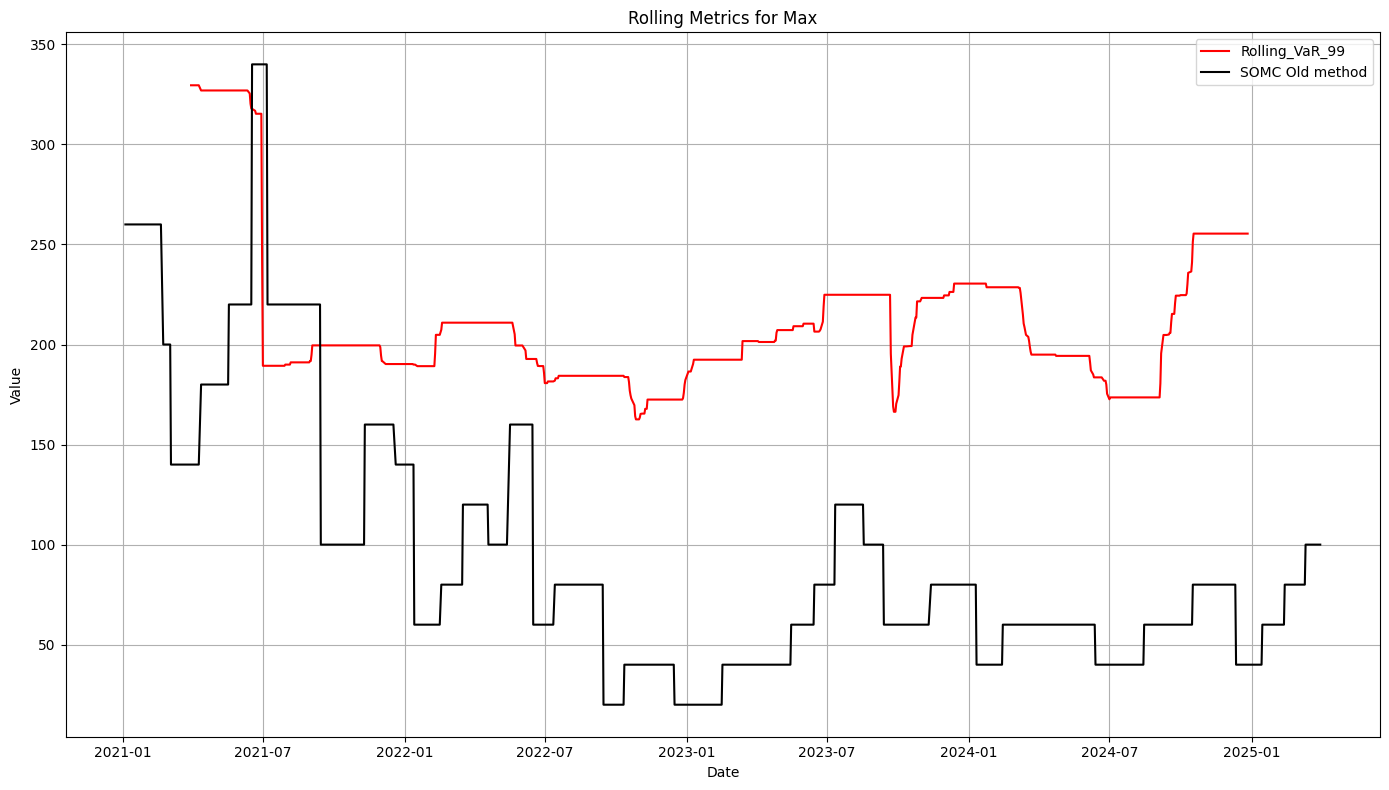

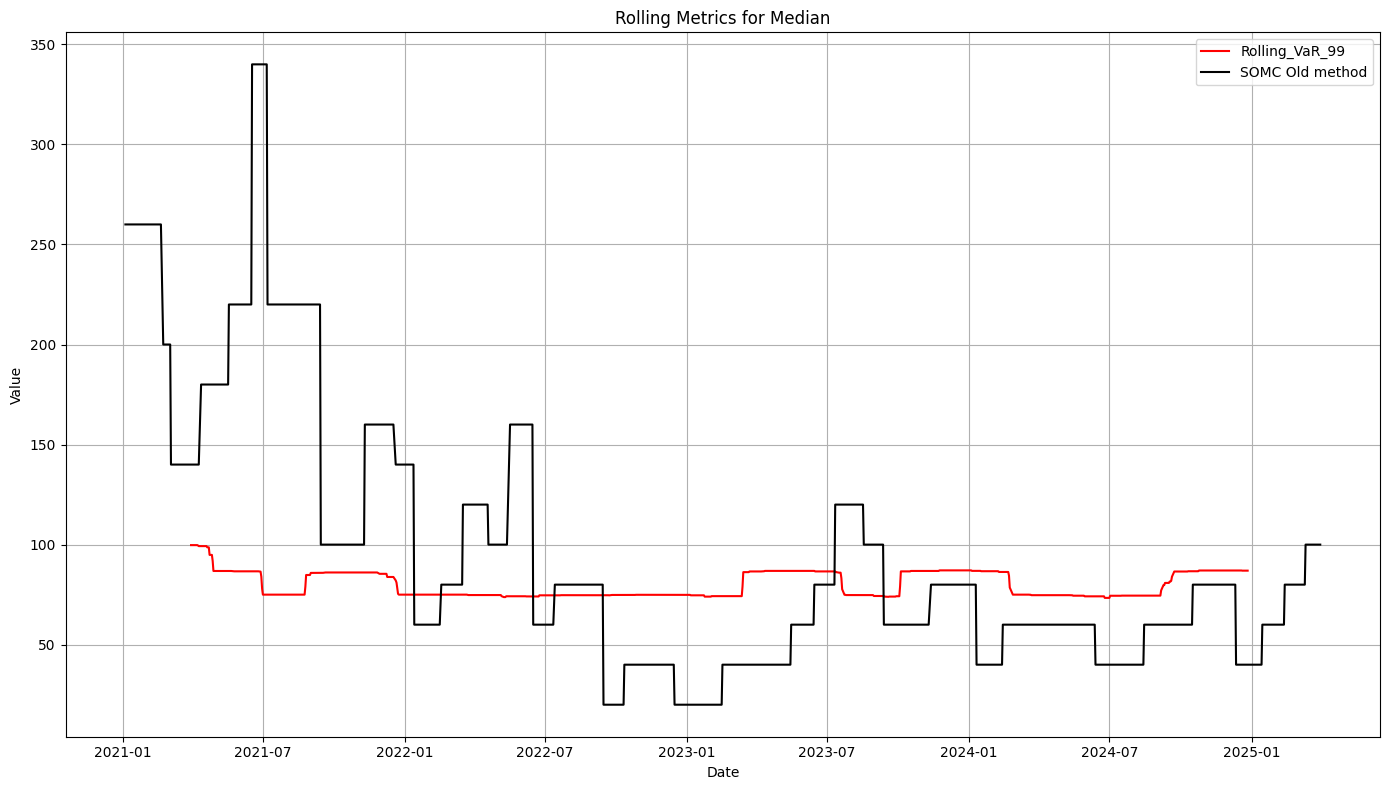

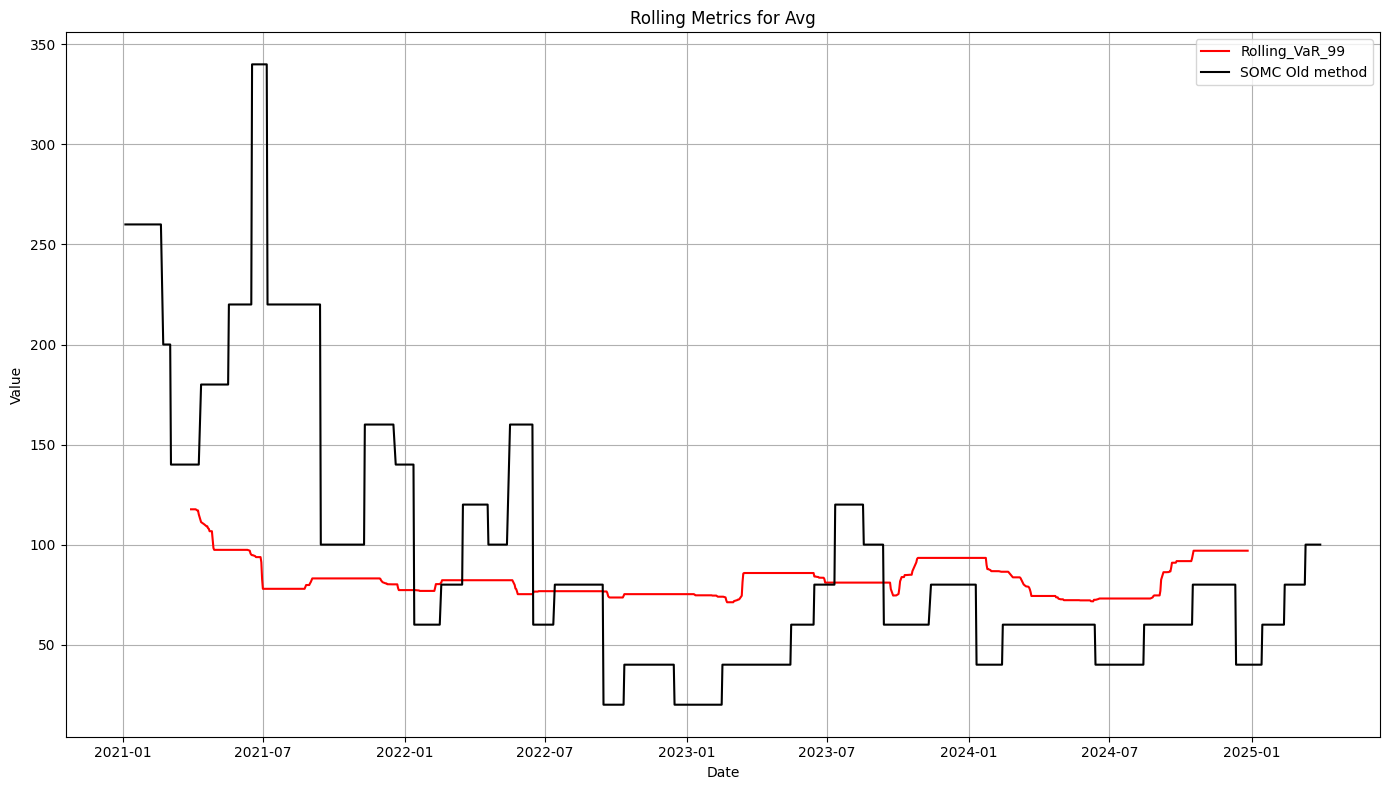

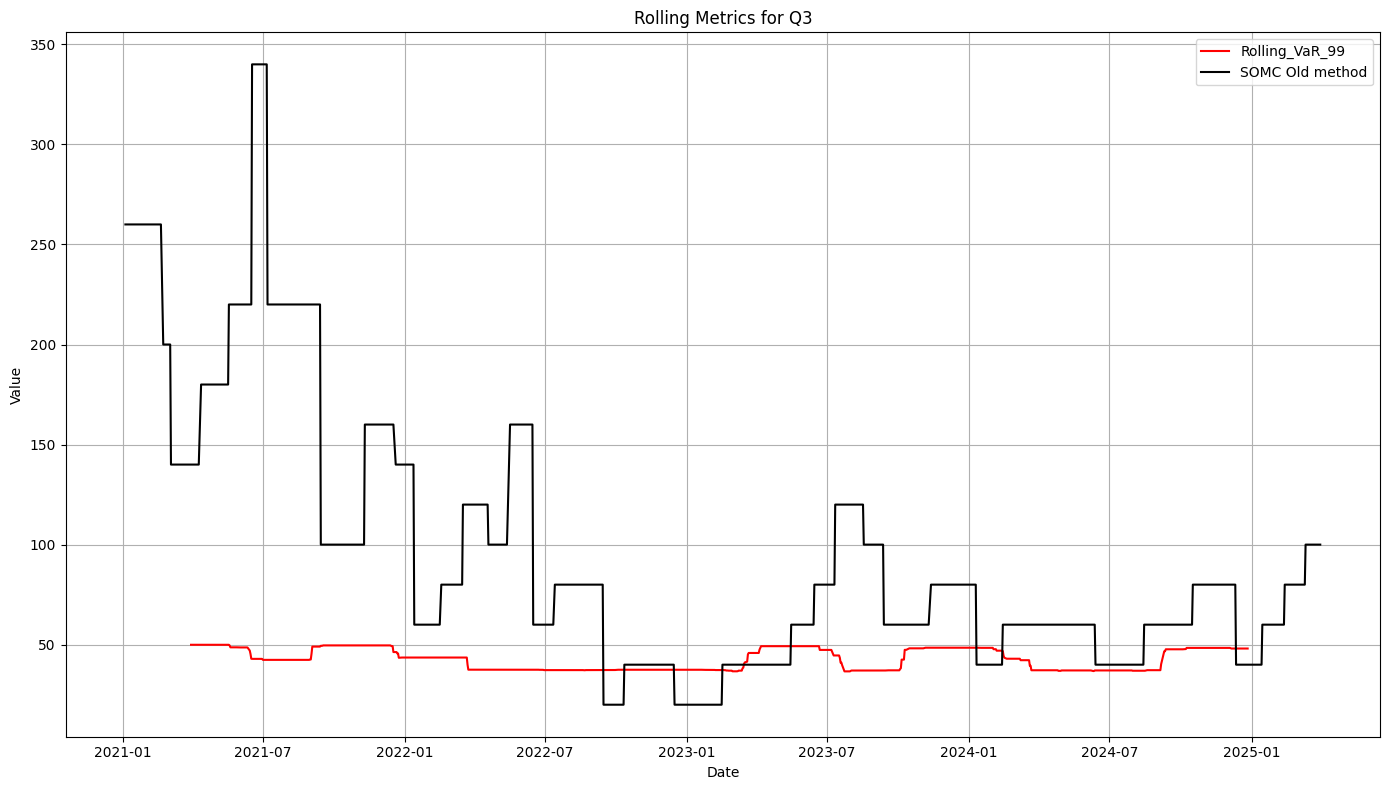

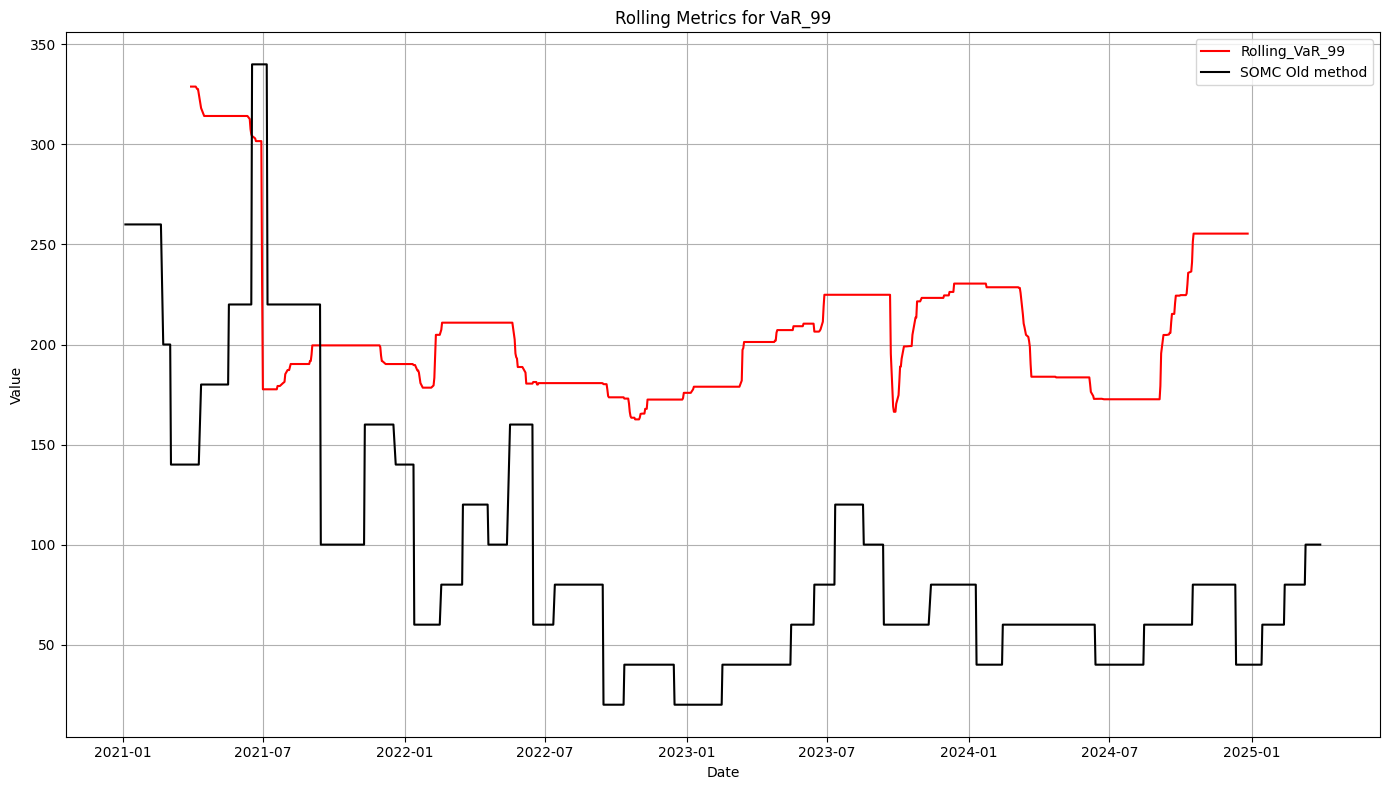

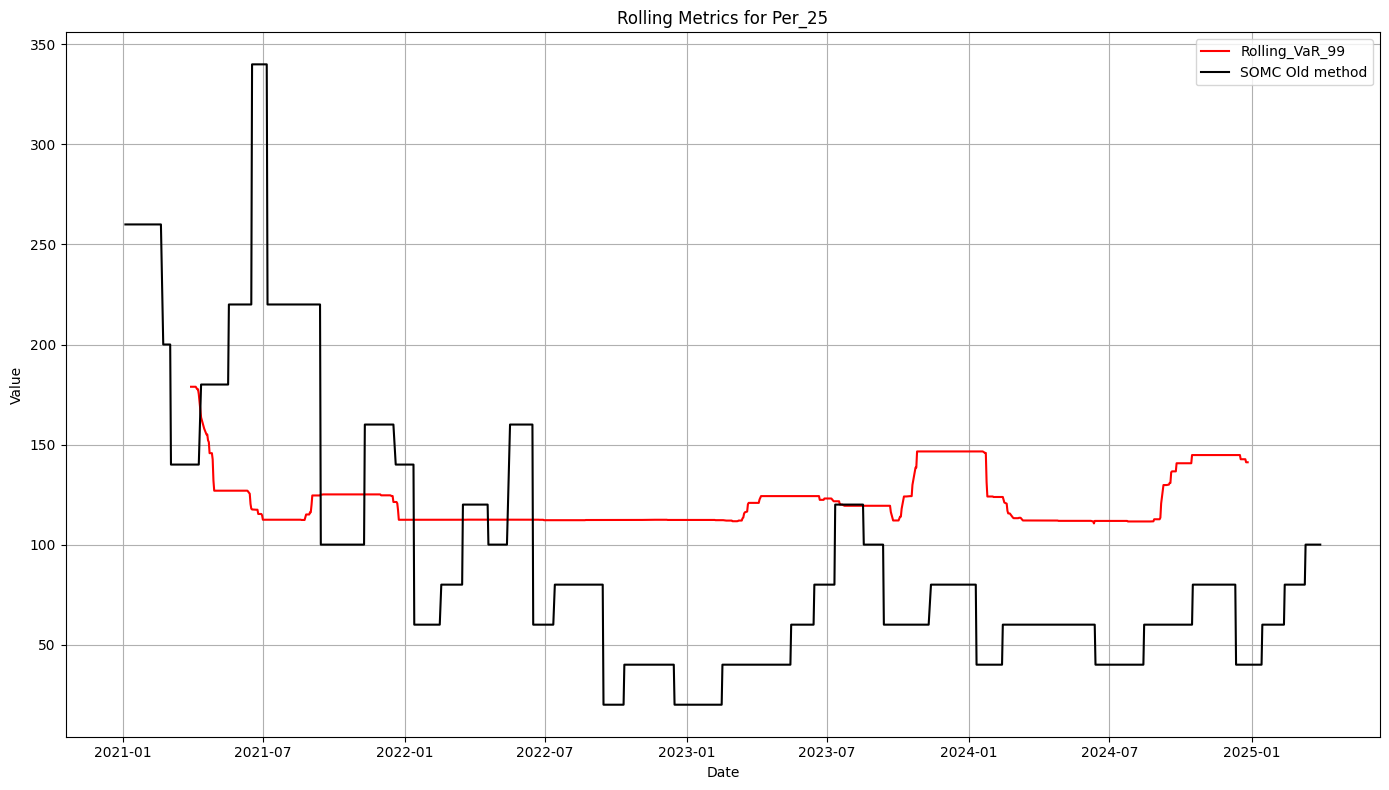

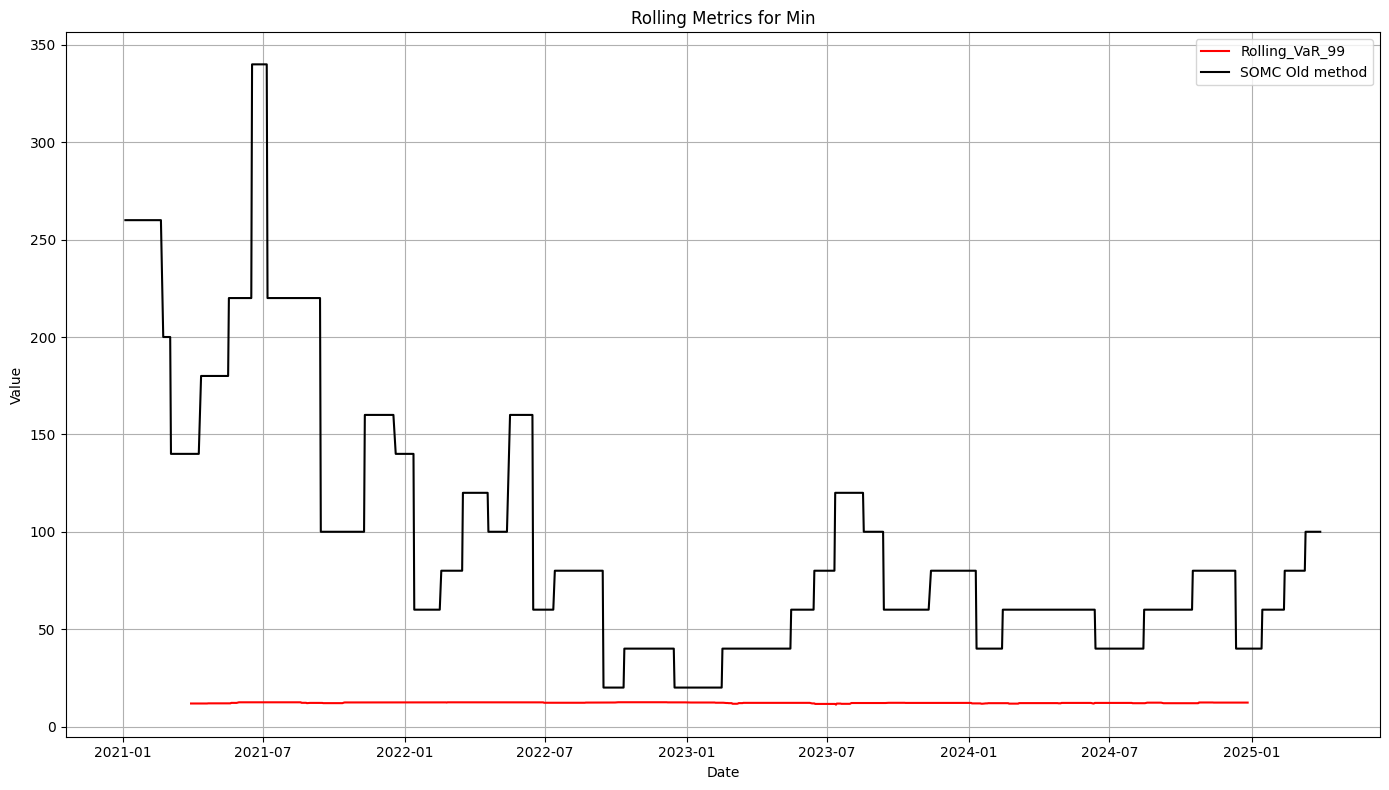

In [138]:
for col in df_loss_summary.columns:
    df = globals()[f"df_r_{col}"]
    
    rolling_cols = [c for c in df.columns if "Rolling" in c]
    
    plt.figure(figsize=(14, 8))
    for roll_col in rolling_cols:
        plt.plot(df.index, df[roll_col]*-1, label=roll_col, color='red')
    plt.plot(somc_series['Date'], somc_series['SOMC'], label='SOMC Old method', color='black')
    plt.title(f"Rolling Metrics for {col}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [139]:
# ตรวจสอบว่า index เป็น datetime แล้ว
if not pd.api.types.is_datetime64_any_dtype(df_loss_summary.index):
    df_loss_summary.index = pd.to_datetime(df_loss_summary.index)

# แยกเป็นรายปีและเก็บในตัวแปร global
for year in df_loss_summary.index.year.unique():
    globals()[f"df_loss_summary_{year}"] = df_loss_summary[df_loss_summary.index.year == year]


In [140]:
df_loss_summary_2020.describe()

NameError: name 'df_loss_summary_2020' is not defined

In [ ]:
df_loss_summary_2021.describe()

In [ ]:
pd.set_option('display.width', 240)
df_loss_summary_2022.describe().round(2)

In [ ]:
df_loss_summary_2023.describe()

In [ ]:
df_loss_summary_2024.describe()

FullinQ สั่งงานมอีกแล้ว

In [ ]:
df_del_1_1

In [ ]:
df_del_1_1

In [ ]:
df_del_66

In [ ]:
for i in range(1, 67):
    strike_df_name = f'df_del_{i}_1'
    
    if strike_df_name in globals():
        df_strike = globals()[strike_df_name].copy()

        # Ensure date alignment
        common_dates = df_strike.index.intersection(se['Price'].index)
        df_strike = df_strike.loc[common_dates]
        S_series = se['Price'].loc[common_dates]
        S_series = pd.to_numeric(S_series, errors='coerce')  # make sure it's float

        df_payoff = pd.DataFrame(index=df_strike.index, columns=df_strike.columns)

        for col in df_strike.columns:
            K_series = pd.to_numeric(df_strike[col], errors='coerce')
            option_type = 'C' if 'C' in col else 'P'

            if option_type == 'C':
                payoff = S_series - K_series
            else:
                payoff = K_series - S_series

            # Apply max(..., 0)
            payoff = payoff.clip(lower=0)

            # Apply only where strike isn't NaN
            df_payoff[col] = payoff.where(df_strike[col].notna())
        globals()[f'df_{i}_2'] = df_payoff

In [ ]:
df_1_2

In [ ]:
dfs = []

for i in range(1, 67):
    var_name = f'df_{i}_2'
    if var_name in globals():
        df = globals()[var_name]
        dfs.append(df)
merged_df_payoff = pd.concat(dfs, axis=1)
mask_all_nan = merged_df_payoff.isna().all(axis=1)
merged_df_payoff.loc[mask_all_nan] = merged_df_payoff.ffill().loc[mask_all_nan]
# ตรวจสอบผลลัพธ์
print(merged_df_payoff.shape)
merged_df_payoff.tail()

In [ ]:
se

In [ ]:
df_r_Avg.describe()

In [ ]:
# Step 1: สร้าง quantile จาก merged_df_payoff
quantiles_df = merged_df_payoff.quantile([0.25, 0.5, 0.75, 1.0], axis=1).T
quantiles_df.columns = ['Q1', 'Q2', 'Q3', 'Max']
quantiles_df['Avg'] = merged_df_payoff.mean(axis=1, skipna=True)

combined = pd.concat([
    quantiles_df,
    df_r_Avg * -1
], axis=1)

combined = combined.loc[:, ~combined.columns.duplicated()]

# Select Series and dropna safely
v99 = combined['Rolling_VaR_99'].dropna()
q2 = combined['Q2'].reindex(v99.index)
avg = combined['Avg'].reindex(v99.index)
q3 = combined['Q3'].reindex(v99.index)
max_ = combined['Max'].reindex(v99.index)

# Compare with proper alignment
coverage_flags = pd.DataFrame({
    'covers_Q2': v99 >= q2,
    'covers_Avg': v99 >= avg,
    'covers_Q3': v99 >= q3,
    'covers_Max': v99 >= max_,
})
coverage_counts = coverage_flags.sum()
coverage_percent = coverage_counts / coverage_flags.notna().sum() * 100

# Step 7: แสดงผล
for label in coverage_flags.columns:
    print(f"--- {label} ---")
    print(f"✅ Covered Days  : {int(coverage_counts[label])}")
    print(f"📊 Coverage Rate : {coverage_percent[label]:.2f}%")
    print()


In [ ]:
print(combined.columns)
print(combined.index[:10])
print(combined['Rolling_VaR_99'].dropna().index[:10])


In [ ]:
import matplotlib.pyplot as plt

# เลือกช่วงวันที่ที่ index ตรงกัน (หลังจาก dropna ไปแล้ว)
plot_df = pd.DataFrame({
    'Rolling_VaR_99': v99,
    'Q2': q2,
    'Avg': avg,
    'Q3': q3,
    'Max': max_
})

# Plot
plt.figure(figsize=(14, 8))
plt.plot(plot_df.index, plot_df['Rolling_VaR_99'], label='Rolling_VaR_99', linestyle='--',linewidth=2, color='black')

# เส้น reference เปรียบเทียบ
# plt.plot(plot_df.index, plot_df['Q2'], label='Q2 (Median)')
# plt.plot(plot_df.index, plot_df['Avg'], label='Avg')
plt.plot(plot_df.index, plot_df['Q3'], label='Q3_Avg_Loss', color='orange')
plt.plot(plot_df.index, plot_df['Max'], label='Q4_Avg_Loss', color='purple')

plt.title("Model 2 : Rolling VaR 99% and Q3/Q4 Average Losses")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def extract_strike(name):
    match = re.search(r'(\d+)$', name)
    return float(match.group(1)) if match else np.nan

df = pd.read_csv(r"Waiting_for_groupby.csv")
se = pd.read_csv(r"SET 50 Historical Data (5).csv")
df['END_DATE'] = pd.to_datetime(df['END_DATE'])
end_date_dict = df.groupby('END_DATE')['NAME'].unique().apply(list).to_dict()

for i, (end_date, sub_df) in enumerate(df.groupby('END_DATE'), start=1):
    globals()[f"df_{i}"] = sub_df.reset_index(drop=True)
df_1

for i in range(1, 55):
    df = globals()[f'df_{i}']

    # 1. Drop columns that are entirely NaN BEFORE melt
    df = df.dropna(axis=1, how='all')

    # 2. Melt: convert wide to long
    df_melted = df.melt(id_vars=['END_DATE', 'NAME'], var_name='Date', value_name='Price')

    # 3. Convert Date to datetime
    df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')

    # 4. Pivot: Date as row index, NAME as column
    df_pivoted = df_melted.pivot(index='Date', columns='NAME', values='Price')

    # 5. Sort for neatness
    df_pivoted = df_pivoted.sort_index().sort_index(axis=1)

    # 6. Save back to globals
    globals()[f'df_{i}'] = df_pivoted
    
for i in range(1, 55):
    name = f'df_{i}'
    if name in globals():
        df = globals()[name].copy()  # สำรองข้อมูล

        # สร้าง mapping: column → strike
        strike_map = {col: extract_strike(col) for col in df.columns}

        # แปลงราคาเป็น strike โดยไม่แตะ NaN
        for col in df.columns:
            strike = strike_map[col]
            df[col] = df[col].apply(lambda x: strike if pd.notna(x) else np.nan)

        # เขียนกลับเข้า globals
        globals()[f'{name}_1'] = df
        
se['Date'] = pd.to_datetime(se['Date'])  # แปลงเป็น datetime ก่อน
se.set_index('Date', inplace=True)       # ตั้งเป็น index

for i in range(1, 55):
    strike_df_name = f'df_{i}_1'
    
    if strike_df_name in globals():
        df_strike = globals()[strike_df_name].copy()

        # Ensure date alignment
        common_dates = df_strike.index.intersection(se['Price'].index)
        df_strike = df_strike.loc[common_dates]
        S_series = se['Price'].loc[common_dates]
        S_series = pd.to_numeric(S_series, errors='coerce')  # make sure it's float

        df_payoff = pd.DataFrame(index=df_strike.index, columns=df_strike.columns)

        for col in df_strike.columns:
            K_series = pd.to_numeric(df_strike[col], errors='coerce')
            option_type = 'C' if 'C' in col else 'P'

            if option_type == 'C':
                payoff = S_series - K_series
            else:
                payoff = K_series - S_series

            # Apply max(..., 0)
            payoff = payoff.clip(lower=0)

            # Apply only where strike isn't NaN
            df_payoff[col] = payoff.where(df_strike[col].notna())

        globals()[f'df_{i}_2'] = df_payoff

all_dates = set()

# 1. รวมวันที่จากทุก df_i_2
for i in range(1, 55):
    df_name = f'df_{i}_2'
    if df_name in globals():
        all_dates.update(globals()[df_name].index)


all_dates = sorted(all_dates)
result_df = pd.DataFrame(index=all_dates, columns=[f'C{i}' for i in range(1, 6)] + [f'P{i}' for i in range(1, 6)])


for date in all_dates:
    all_calls = []
    all_puts = []

    for i in range(1, 55):
        df_name = f'df_{i}_2'
        if df_name in globals():
            df = globals()[df_name]
            if date in df.index:
                row = df.loc[date]

                calls = row[[col for col in row.index if 'C' in col]].dropna().values
                puts = row[[col for col in row.index if 'P' in col]].dropna().values

                all_calls.extend(calls)
                all_puts.extend(puts)

    top_calls = sorted(all_calls, reverse=True)[:5]
    top_puts = sorted(all_puts, reverse=True)[:5]

    top_calls += [np.nan] * (5 - len(top_calls))
    top_puts += [np.nan] * (5 - len(top_puts))

    result_df.loc[date, [f'C{i}' for i in range(1, 6)]] = top_calls
    result_df.loc[date, [f'P{i}' for i in range(1, 6)]] = top_puts

result_df = result_df.ffill().infer_objects()

daily_mean_loss = -result_df.mean(axis=1)  # axis=1 → max across columns per row

dfs = []

for i in range(1, 55):
    var_name = f'df_{i}_2'
    if var_name in globals():
        df = globals()[var_name]
        dfs.append(df)

# รวมทุก df ตาม columns (axis=1) โดย merge บน index (Date)
merged_df_payoff = pd.concat(dfs, axis=1)
mask_all_nan = merged_df_payoff.isna().all(axis=1)
merged_df_payoff.loc[mask_all_nan] = merged_df_payoff.ffill().loc[mask_all_nan]
# ตรวจสอบผลลัพธ์
print(merged_df_payoff.shape)

# กำหนดข้อมูล Q1, Q2, Q3
# q1 = merged_df_payoff.quantile(0.25, axis=1)
# q2 = merged_df_payoff.quantile(0.50, axis=1)
q3 = merged_df_payoff.quantile(0.75, axis=1)
q4 = merged_df_payoff.quantile(1.00, axis=1)

# เติมเฉพาะวันที่เป็น NaN ล้วน
mask_all_nan = merged_df_payoff.isna().all(axis=1)
merged_df_payoff.loc[mask_all_nan] = merged_df_payoff.ffill().loc[mask_all_nan]

plt.figure(figsize=(14, 8))
plt.plot(plot_df.index, plot_df['Rolling_VaR_99'], label='Rolling_VaR_99', linestyle='--',linewidth=2, color='black')
# plt.plot(q1.index, q1, label='Q1', color='green')
# plt.plot(q2.index, q2, label='Q2', color='blue')
plt.plot(q3.index, q3, label='Q3_Avg_Loss', color='orange')
plt.plot(q4.index, q4, label='Q4_Avg_Loss', color='purple')
plt.title("Model 2 : Rolling VaR 99% and Q3/Q4 Average Losses")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()